In [1]:
%matplotlib inline

In [2]:
import requests
import re
from fastai.text import *
import torch

In [3]:
book = requests.get('https://www.gutenberg.org/files/36/36-0.txt').text

In [4]:
start_iter = re.finditer('BOOK ONE', book)

In [5]:
next(start_iter)

<_sre.SRE_Match object; span=(1067, 1075), match='BOOK ONE'>

Commenting out some print lines here to shrink the notebook -- I did some exploration to figure out where the actual story began and ended (excluding table of contents, acknowledgements, etc.)

In [6]:
# book[1067:]

In [7]:
next(start_iter)

<_sre.SRE_Match object; span=(1920, 1928), match='BOOK ONE'>

In [8]:
# book[1920:]

In [9]:
book = book[1920:]

In [10]:
end_iter = re.finditer("among the dead.", book)

In [11]:
next(end_iter)

<_sre.SRE_Match object; span=(64109, 64124), match='among the dead '>

In [12]:
# book[:64125]

In [13]:
next(end_iter)

<_sre.SRE_Match object; span=(345594, 345609), match='among the dead.'>

In [14]:
# book[:345609]

In [15]:
book = book[:345609]

In [16]:
book = re.sub(r'[\r\n]+', ' ', str(book))

In [17]:
# book

In [18]:
tokens = [i.replace(',', '') for i in book.split('.')]

In [19]:
# tokens

In [20]:
tokens[:10]

['BOOK ONE THE COMING OF THE MARTIANS I',
 ' THE EVE OF THE WAR',
 ' No one would have believed in the last years of the nineteenth century that this world was being watched keenly and closely by intelligences greater than manâ\x80\x99s and yet as mortal as his own; that as men busied themselves about their various concerns they were scrutinised and studied perhaps almost as narrowly as a man with a microscope might scrutinise the transient creatures that swarm and multiply in a drop of water',
 ' With infinite complacency men went to and fro over this globe about their little affairs serene in their assurance of their empire over matter',
 ' It is possible that the infusoria under the microscope do the same',
 ' No one gave a thought to the older worlds of space as sources of human danger or thought of them only to dismiss the idea of life upon them as impossible or improbable',
 ' It is curious to recall some of the mental habits of those departed days',
 ' At most terrestrial men fa

In [21]:
! rm book_text.csv

In [22]:
with open('book_text.csv', 'a+') as file:
    for sentence in tokens:
        file.write(sentence + '\n')

In [23]:
with open('book_text.csv') as file:
    lines = file.readlines()[:5]
print(lines[0])
print(lines[1])
print(lines[2])

BOOK ONE THE COMING OF THE MARTIANS I

 THE EVE OF THE WAR

 No one would have believed in the last years of the nineteenth century that this world was being watched keenly and closely by intelligences greater than manâs and yet as mortal as his own; that as men busied themselves about their various concerns they were scrutinised and studied perhaps almost as narrowly as a man with a microscope might scrutinise the transient creatures that swarm and multiply in a drop of water



In [24]:
pd.read_csv('book_text.csv').iloc[20][0]

' And looking across space with instruments and intelligences such as we have scarcely dreamed of they see at its nearest distance only 35000000 of miles sunward of them a morning star of hope our own warmer planet green with vegetation and grey with water with a cloudy atmosphere eloquent of fertility with glimpses through its drifting cloud wisps of broad stretches of populous country and narrow navy-crowded seas'

In [25]:
data = TextLMDataBunch.from_csv('.', 'book_text.csv', text_cols=0)

In [26]:
data

TextLMDataBunch;

Train: LabelList (2434 items)
x: LMTextList
xxbos xxmaj northward were xxmaj kilburn and xxmaj xxunk blue and crowded with houses ; westward the great city was xxunk ; and southward beyond the xxmaj martians the green waves of xxmaj regentâs xxmaj park the xxmaj langham xxmaj xxunk the dome of the xxmaj albert xxmaj hall the xxmaj xxunk xxmaj xxunk and the giant mansions of the xxmaj brompton xxmaj road came out clear and little in the sunrise the xxunk ruins of xxmaj westminster rising xxunk beyond,xxbos xxmaj there were three girls xxmaj east xxmaj end xxunk girls and a couple of little children crowded in the cart,xxbos â xxunk you meant me to xxunk xxunk xxunk didnât xxmaj xxunk âwe wonât quarrel about that,xxbos xxmaj very likely youâve seen the same thing,xxbos xxmaj the early morning was xxunk still and the sun just clearing the pine trees towards xxmaj weybridge was already warm
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (609 items)
x: LMTextLi

In [27]:
data.train_ds[0]

(Text xxbos xxmaj northward were xxmaj kilburn and xxmaj xxunk blue and crowded with houses ; westward the great city was xxunk ; and southward beyond the xxmaj martians the green waves of xxmaj regentâs xxmaj park the xxmaj langham xxmaj xxunk the dome of the xxmaj albert xxmaj hall the xxmaj xxunk xxmaj xxunk and the giant mansions of the xxmaj brompton xxmaj road came out clear and little in the sunrise the xxunk ruins of xxmaj westminster rising xxunk beyond,
 EmptyLabel )

In [28]:
data.train_ds[1][0].data

array([   2,    5,   36,   25,  120, 2047,    5,  864,    5,  257,    0, 2047,   10,   12,  328,   11,   74,  687,
        609,   15,    9,  300])

In [29]:
data.valid_ds[1][0].data

array([  2,   5,   9,   0,   0,  13, 182,   0, 180,  21,   0, 164, 324,   0,  16, 183,   0,   0])

In [30]:
data.one_batch()[0].shape

torch.Size([64, 70])

In [31]:
x, y = data.one_batch()

In [32]:
x.shape, y.shape

(torch.Size([64, 70]), torch.Size([64, 70]))

In [33]:
x[0], y[0]

(tensor([ 282,  185, 1221,    9,  213,  127,   65,    5,  301,   16,  158,  866,
            2,    5,   21,    9,  177,  102, 2050,   42,  762,  516,   39, 2051,
          177,   10, 1222,   75,   21,   18,  552,    2,    5,   20,   85,  867,
           63, 1223,   10,  133,   14, 1525,  204,   22,  302, 2052,   14,    9,
          191,   15,  426,   14,  868,  171,   11,    9,  374,  688,    2,    5,
          106,   24,   16, 1007,   80,    9,  303,   13,   19, 1224]),
 tensor([ 185, 1221,    9,  213,  127,   65,    5,  301,   16,  158,  866,    2,
            5,   21,    9,  177,  102, 2050,   42,  762,  516,   39, 2051,  177,
           10, 1222,   75,   21,   18,  552,    2,    5,   20,   85,  867,   63,
         1223,   10,  133,   14, 1525,  204,   22,  302, 2052,   14,    9,  191,
           15,  426,   14,  868,  171,   11,    9,  374,  688,    2,    5,  106,
           24,   16, 1007,   80,    9,  303,   13,   19, 1224,   63]))

In [34]:
len(data.vocab.itos)

3104

In [35]:
nv = len(data.vocab.itos)

In [36]:
nh = 64

In [37]:
bs = 64

In [38]:
nv, nh, bs

(3104, 64, 64)

In [39]:
class BasicLanguageModel(nn.Module):
     
    def __init__(self):
        super().__init__()
        self.i_h = nn.Embedding(nv, nh) 
        self.h_h = nn.Linear(nh, nh)
        self.h_o = nn.Linear(nh, nv)
        self.bn = nn.BatchNorm1d(nh)
        self.reset()
        
    def forward(self, x):
        res = []
        h = self.h
        for i in range(x.shape[1]):
            h = h + self.i_h(x[:,i]) 
            h = F.relu(self.h_h(h))
            res.append(self.bn(h))
        self.h = h.detach()
        res_stacked = torch.stack(res, dim=1)
        return (self.h_o(res_stacked), res, res)
    
    def reset(self):
        self.h = torch.zeros(nh, nh).cuda()

In [40]:
mdl = BasicLanguageModel()

In [41]:
mdl

BasicLanguageModel(
  (i_h): Embedding(3104, 64)
  (h_h): Linear(in_features=64, out_features=64, bias=True)
  (h_o): Linear(in_features=64, out_features=3104, bias=True)
  (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [42]:
learn = LanguageLearner(data, model=mdl, metrics=accuracy)

In [43]:
learn.fit(10, lr=3e-2)

epoch,train_loss,valid_loss,accuracy,time
0,6.578137,5.209803,0.148158,00:00
1,5.860476,4.970843,0.183147,00:00
2,5.499151,4.827905,0.195424,00:00
3,5.247980,4.718881,0.206306,00:00
4,5.052089,4.656441,0.210045,00:00
5,4.886156,4.650042,0.210882,00:00
6,4.738593,4.615984,0.211775,00:00
7,4.606099,4.637669,0.211775,00:00
8,4.483258,4.651525,0.213170,00:00
9,4.368689,4.647550,0.217522,00:00


In [44]:
learn.summary()

BasicLanguageModel
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [64]                 198,656    True      
______________________________________________________________________
Linear               [64]                 4,160      True      
______________________________________________________________________
Linear               [70, 3104]           201,760    True      
______________________________________________________________________
BatchNorm1d          [64]                 128        True      
______________________________________________________________________

Total params: 404,704
Total trainable params: 404,704
Total non-trainable params: 0
Optimized with 'torch.optim.adam.Adam', betas=(0.9, 0.99)
Using true weight decay as discussed in https://www.fast.ai/2018/07/02/adam-weight-decay/ 
Loss function : FlattenedLoss
Callbacks functions applied 
    RNNTrainer

In [45]:
data.show_batch(ds_type=DatasetType.Valid)

idx,text
0,xxbos xxmaj the morning was bright and xxunk and the xxunk sky glowed pink and was xxunk with little xxunk clouds xxbos xxmaj the xxunk xxunk i may xxunk here as xxunk has since xxunk was almost xxunk xxunk xxbos âi shall go xxunk he said xxbos xxmaj at last after xxunk the artilleryman made a rush for it and got over the railway xxunk xxbos xxmaj he became suddenly
1,the silent road the xxunk sound of âulla ulla ulla xxunk xxunk itself xxbos xxmaj he xxunk it to a colossal puff of flame suddenly and violently xxunk out of the planet xxunk flaming xxunk rushed out of a gun xxbos xxmaj the xxunk and gravel about it seemed charred as if by a sudden explosion xxbos xxmaj the xxmaj xxunk in spite of their human xxunk were entirely swept
2,âulla ulla ulla xxunk xxunk that xxunk xxunk waves of sound sweeping down the broad sunlit roadway between the tall buildings on each side xxbos xxmaj in any case we should be prepared xxbos xxmaj the northern hills were xxunk in darkness ; the xxunk near xxmaj kensington glowed xxunk and now and then an xxunk - red xxunk of flame flashed up and vanished in the deep blue night
3,within the hood was slain and splashed to the four xxunk of xxunk and the xxmaj thing was now but a mere xxunk xxunk of metal whirling to destruction xxbos xxmaj as i crossed the bridge the sound of âulla ulla ulla xxunk ceased xxbos xxmaj there was something xxunk in the xxunk brown skin something in the xxunk xxunk of the xxunk movements xxunk xxunk xxbos xxmaj all night
4,suddenly and xxunk struck her out of being xxbos xxmaj in the back of this head or xxunk scarcely know how to xxunk of xxunk the single xxunk xxunk surface since known to be xxunk an xxunk though it must have been almost xxunk in our dense air xxbos xxmaj they wanted a light xxunk put up and help to keep the people back xxbos i xxunk on xxunk towards


In [46]:
learn.data.bs

64

In [52]:
test_snippet = "The martian stood in the darkness "

In [53]:
learn.predict("The martian stood in the darkness ", n_words=30)

'The martian stood in the darkness  xxbos But he saw the shaft of Mars just not firewood And is looking along the road staring xxbos â\x80\x9cthe Ago lay through his desire to'

In [54]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


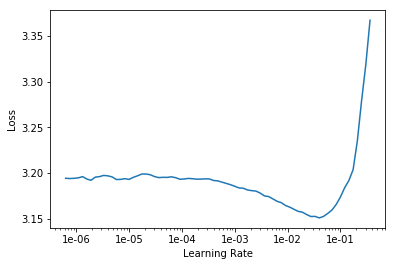

In [55]:
learn.recorder.plot()

In [56]:
learn.fit(10, lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.154905,4.985077,0.207980,00:00
1,3.109632,5.078881,0.205190,00:00
2,3.079642,5.058093,0.205915,00:00
3,3.056859,5.067978,0.207980,00:00
4,3.042782,5.073485,0.206417,00:00
5,3.028812,5.126457,0.201842,00:00
6,3.016256,5.275877,0.202902,00:00
7,3.006789,5.115167,0.206752,00:01
8,2.995633,5.136113,0.204408,00:00
9,2.985399,5.184430,0.204241,00:01


In [57]:
learn.predict(test_snippet, n_words=30)

'The martian stood in the darkness  of the hedge came the railway junction force from Saturday morning from the joints of space perfectly air of not imagine the last window and blows xxbos The'

In [58]:
learn.save("basic")

In [59]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


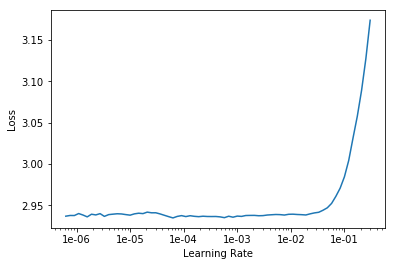

In [60]:
learn.recorder.plot()

In [61]:
learn.fit_one_cycle(20, max_lr=3e-5)

epoch,train_loss,valid_loss,accuracy,time
0,2.934248,5.122794,0.206529,00:00
1,2.934482,5.135861,0.204408,00:00
2,2.935062,5.157544,0.203906,00:00
3,2.935436,5.152337,0.203181,00:00
4,2.935356,5.111585,0.206250,00:01
5,2.934473,5.140803,0.203404,00:01
6,2.935220,5.114218,0.203627,00:01
7,2.935323,5.110648,0.206752,00:01
8,2.936233,5.131757,0.203404,00:01
9,2.934956,5.170055,0.202455,00:01


We're overfitting at this point, not much use in training further.

# LSTM

In [66]:
class LSTMCustom(nn.Module):
     
    def __init__(self):
        super().__init__()
        self.i_h = nn.Embedding(nv, nh)
        self.h_o = nn.Linear(nh, nv)
        self.bn = nn.BatchNorm1d(nh)
        self.forget_gate = nn.Linear(nh*2, nh)
        self.input_gate = nn.Linear(nh*2, nh)
        self.candidate_gate = nn.Linear(nh*2, nh)
        self.output_gate = nn.Linear(nh*2, nh)
        self.combine_gate = nn.Linear(nh*2, nh)
        self.reset()
        
    def format_for_prediction(self, x):
        return torch.cat([x]*bs)
        
    def forward(self, x):
        res = []
        h = self.h
        cell_state = self.cell_state 
        if x.shape[0] == 1:
            x = self.format_for_prediction(x)
        for i in range(x.shape[1]):
            x_i = self.i_h(x[:,i])
            concat = torch.cat([x_i, h], 1)
            forget_gate = nn.Sigmoid()(self.forget_gate(concat))
            cell_state = forget_gate * cell_state
            input_gate = nn.Sigmoid()(self.input_gate(concat))
            candidate_gate = nn.Tanh()(self.candidate_gate(concat))
            cell_state = cell_state + (input_gate * candidate_gate)
            output_gate = nn.Sigmoid()(self.output_gate(concat))
            combine_gate = nn.Tanh()(cell_state)
            h = combine_gate * output_gate 
            res.append(h)
        self.h = h.detach()
        self.cell_state = cell_state.detach()
        res_stacked = torch.stack(res, dim=1)
        return self.h_o(res_stacked), res, res
    
    def reset(self):
        self.h = torch.zeros(bs, nh).cuda()
        self.cell_state = torch.zeros(bs, nh).cuda()

In [67]:
learn = LanguageLearner(data, LSTMCustom(), metrics=accuracy)

In [68]:
learn.bptt = 70

In [69]:
learn.fit_one_cycle(20, max_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,8.027231,8.005952,0.003739,00:02
1,7.984003,7.823420,0.096094,00:01
2,7.637436,6.152973,0.100223,00:02
3,7.004225,5.417409,0.108538,00:02
4,6.527415,5.196336,0.146540,00:02
5,6.160872,4.995858,0.166741,00:02
6,5.857443,4.866591,0.184431,00:01
7,5.601080,4.751483,0.195592,00:02
8,5.383888,4.682719,0.205078,00:01
9,5.198525,4.626913,0.209766,00:02


In [70]:
learn.predict(test_snippet, n_words=30)

'The martian stood in the darkness  treetops xxbos From the â\x80\x9conly no next one i xxbos i did not against out yards but i stood under she fixed alive by deter ulla hurried going on'

In [71]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


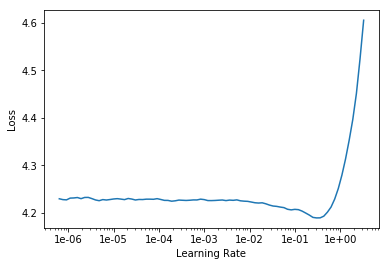

In [72]:
learn.recorder.plot()

In [73]:
learn.save('lstm-1')

In [75]:
learn.load('lstm-1')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (2434 items)
x: LMTextList
xxbos xxmaj northward were xxmaj kilburn and xxmaj xxunk blue and crowded with houses ; westward the great city was xxunk ; and southward beyond the xxmaj martians the green waves of xxmaj regentâs xxmaj park the xxmaj langham xxmaj xxunk the dome of the xxmaj albert xxmaj hall the xxmaj xxunk xxmaj xxunk and the giant mansions of the xxmaj brompton xxmaj road came out clear and little in the sunrise the xxunk ruins of xxmaj westminster rising xxunk beyond,xxbos xxmaj there were three girls xxmaj east xxmaj end xxunk girls and a couple of little children crowded in the cart,xxbos â xxunk you meant me to xxunk xxunk xxunk didnât xxmaj xxunk âwe wonât quarrel about that,xxbos xxmaj very likely youâve seen the same thing,xxbos xxmaj the early morning was xxunk still and the sun just clearing the pine trees towards xxmaj weybridge was already warm
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (6

In [76]:
learn.fit_one_cycle(20, max_lr=3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,4.229340,4.511879,0.220759,00:02
1,4.226675,4.510827,0.220982,00:02
2,4.225100,4.510665,0.220815,00:02
3,4.226668,4.510237,0.220647,00:02
4,4.226034,4.509562,0.221429,00:02
5,4.223857,4.509542,0.220982,00:02
6,4.221792,4.508519,0.221094,00:02
7,4.219576,4.507504,0.221540,00:02
8,4.218019,4.507212,0.221540,00:02
9,4.214967,4.506796,0.221652,00:02


In [77]:
learn.save("lstm-2")

In [78]:
learn.load("lstm-2")

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (2434 items)
x: LMTextList
xxbos xxmaj northward were xxmaj kilburn and xxmaj xxunk blue and crowded with houses ; westward the great city was xxunk ; and southward beyond the xxmaj martians the green waves of xxmaj regentâs xxmaj park the xxmaj langham xxmaj xxunk the dome of the xxmaj albert xxmaj hall the xxmaj xxunk xxmaj xxunk and the giant mansions of the xxmaj brompton xxmaj road came out clear and little in the sunrise the xxunk ruins of xxmaj westminster rising xxunk beyond,xxbos xxmaj there were three girls xxmaj east xxmaj end xxunk girls and a couple of little children crowded in the cart,xxbos â xxunk you meant me to xxunk xxunk xxunk didnât xxmaj xxunk âwe wonât quarrel about that,xxbos xxmaj very likely youâve seen the same thing,xxbos xxmaj the early morning was xxunk still and the sun just clearing the pine trees towards xxmaj weybridge was already warm
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (6

In [79]:
learn.fit_one_cycle(20, max_lr=3e-4)

epoch,train_loss,valid_loss,accuracy,time
0,4.197511,4.505089,0.221708,00:02
1,4.197366,4.505612,0.220982,00:01
2,4.198159,4.504360,0.221429,00:02
3,4.197339,4.504414,0.221429,00:02
4,4.194533,4.503497,0.221261,00:02
5,4.193008,4.503351,0.221205,00:01
6,4.190657,4.503177,0.220871,00:01
7,4.188234,4.502963,0.221150,00:02
8,4.185715,4.502110,0.221596,00:02
9,4.183272,4.501369,0.222377,00:02


In [83]:
learn.predict(test_snippet, n_words=100)

'The martian stood in the darkness  towards the daylight network xxbos i said and has lay before such it came to find and supper off in a heavy - walls by but i did not moved - machines to live from xxbos By energy â\x80\x9cgod i not a moment of the Way and a hole in the streets had gone xxbos Is us make an safe much to those aperture and till several also of the sailors were no flight so the coast suggested of the things burst but it was in pounds to youâ\x80\x99ve wonder the way out of the cylinder xxbos'

In [327]:
class LSTMModel(nn.Module):
     
    def __init__(self):
        super().__init__()
        self.i_h = nn.Embedding(nv, nh)
        self.h_o = nn.Linear(nh, nv)
        self.bn = BatchNorm1dFlat(nh)
        self.lstm = nn.LSTM(nh, nh, 1, batch_first=True, dropout=1) 
        self.reset()
        
    def fill_batch(self, x):
        if x.shape[0] == 1:
            return torch.stack([x]*bs).squeeze(1)
        return x 
        
    def forward(self, x):
        res, (h, c) = self.lstm(self.i_h(self.fill_batch(x)), (self.h, self.c))
        self.h, self.c = h.detach(), c.detach()
        return (self.h_o(self.bn(res)), list(res.split(res.shape[1])), list(res.split(res.shape[1])))
    
    def reset(self):
        self.h = torch.zeros(1, bs, nh).cuda()
        self.c = torch.zeros(1, bs, nh).cuda()

In [328]:
learn = LanguageLearner(data, LSTMModel(), metrics=accuracy)

/home/paperspace/anaconda3/lib/python3.6/site-packages/torch/nn/modules/rnn.py:46: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [329]:
learn.model

LSTMModel(
  (i_h): Embedding(3104, 64)
  (h_o): Linear(in_features=64, out_features=3104, bias=True)
  (bn): BatchNorm1dFlat(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(64, 64, batch_first=True, dropout=1)
)

In [330]:
learn.fit_one_cycle(20, max_lr=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,8.091825,8.046666,0.000223,00:00
1,8.056724,7.998231,0.029018,00:00
2,7.980494,7.815651,0.060100,00:00
3,7.831955,7.401356,0.115067,00:00
4,7.585742,6.759568,0.143080,00:00
5,7.187587,5.841051,0.151116,00:00
6,6.706120,5.235222,0.169922,00:00
7,6.264232,4.971464,0.185212,00:00
8,5.884521,4.796915,0.198382,00:00
9,5.565966,4.695590,0.205748,00:00


In [331]:
learn.predict(test_snippet, n_words=100)

'The martian stood in the darkness  mould containing no strangest past against the nearer and this Towers had gigantic like it but fallen already out of the corner slashed of country and the june evening on xxbos â\x80\x9d Moreover has to space Richmond Earthly that Beam xxbos Grotesque they farther â\x80\x9cpoor the sun table to get xxbos The entire donâ\x80\x99t of i turned among the orderly could across the houses of the government of their cellars emotion and that were position being less in a soldier of smoke xxbos At the place whose past were the tongues of'

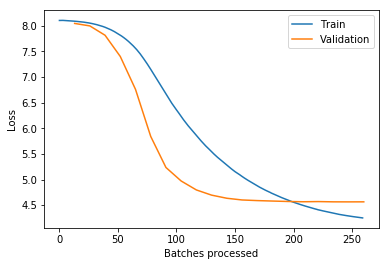

In [332]:
learn.recorder.plot_losses()

In [333]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


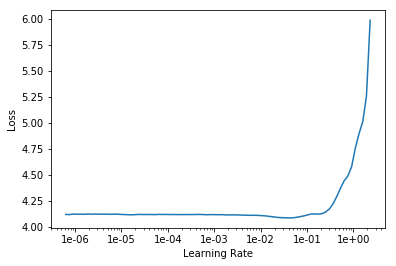

In [294]:
learn.recorder.plot()

In [334]:
learn.fit_one_cycle(20, max_lr=3e-5)

epoch,train_loss,valid_loss,accuracy,time
0,4.111355,4.563935,0.218917,00:00
1,4.110534,4.564224,0.218750,00:00
2,4.109728,4.564964,0.218806,00:00
3,4.110678,4.564531,0.218583,00:00
4,4.111457,4.564820,0.218583,00:00
5,4.111198,4.563972,0.218471,00:00
6,4.110984,4.564280,0.219252,00:00
7,4.109671,4.564103,0.218248,00:00
8,4.108812,4.564663,0.219141,00:00
9,4.108799,4.563367,0.218694,00:00


In [335]:
learn.predict(test_snippet, n_words=100)

'The martian stood in the darkness  to sea xxbos one of the refugees of the Bread and a intervals of vehicles could not a haze of soaked : near into the Martian Sun on the eleventh blew from the sky xxbos Points took some staring of food in this this of sound were some four hours and it was again xxbos My mercy brother sat save no doubt i could see to â\x80\x9cpoor if at the crash of the evident of a great officers where Science Barnes xxbos There were or two persons and left a escaping with'

In [336]:
learn.save("lstm-2")